In [29]:
import pandas as pd
add=pd.read_csv('기상관측 지점 코드.csv',header = None,engine='python')

In [46]:
add.head()

,0,지점,2,시도
0,속초,90,강원도 고성군 토성면 봉포5길 9 속초고층관측소,강원도
1,북춘천,93,강원도 춘천시 신북읍 장본1길 12 춘천기상대,강원도
2,철원,95,강원도 철원군 갈말읍 명성로179번길 26 철원자동기상관측소,강원도
3,독도,96,경상북도 울릉군 울릉읍 독도이사부길 63,경상북도
4,동두천,98,경기도 동두천시 방죽로 16-47 동두천자동기상관측소,경기도


In [31]:
new = add[2].str.split(' ', n = 1, expand = True)  #공백으로 한번만 쪼개기  ex) '대전 광역시' 하면 new[0] = 대전 / new[1] = 광역시
add['시도'] = new[0] #시도라는 새로운 변수 만들어줌
#LKS['시군구'] = new[1]

In [32]:
add.columns.values[1]='지점'

In [39]:
cli=pd.read_csv('2018climate.csv',engine='python')

In [38]:
cli.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,지점,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),...,0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),기사,안개 계속시간(hr)
1,90,2018-01-01,1,-3.2,343,4.2,1443,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,90,2018-01-02,1.5,-2.1,2344,5.6,1358,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90,2018-01-03,-1.6,-5.5,732,3.3,1432,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,90,2018-01-04,-1,-5.7,342,2.2,1449,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
abc = pd.merge(add,cli)

In [36]:
abc.head()

,0,지점,2,시도,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),...,0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),기사,안개 계속시간(hr)
0,속초,90,강원도 고성군 토성면 봉포5길 9 속초고층관측소,강원도,2018-01-01,1.0,-3.2,343.0,4.2,1443.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,속초,90,강원도 고성군 토성면 봉포5길 9 속초고층관측소,강원도,2018-01-02,1.5,-2.1,2344.0,5.6,1358.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,속초,90,강원도 고성군 토성면 봉포5길 9 속초고층관측소,강원도,2018-01-03,-1.6,-5.5,732.0,3.3,1432.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,속초,90,강원도 고성군 토성면 봉포5길 9 속초고층관측소,강원도,2018-01-04,-1.0,-5.7,342.0,2.2,1449.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,속초,90,강원도 고성군 토성면 봉포5길 9 속초고층관측소,강원도,2018-01-05,1.5,-1.4,806.0,7.2,1331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, '20143135 이경수')

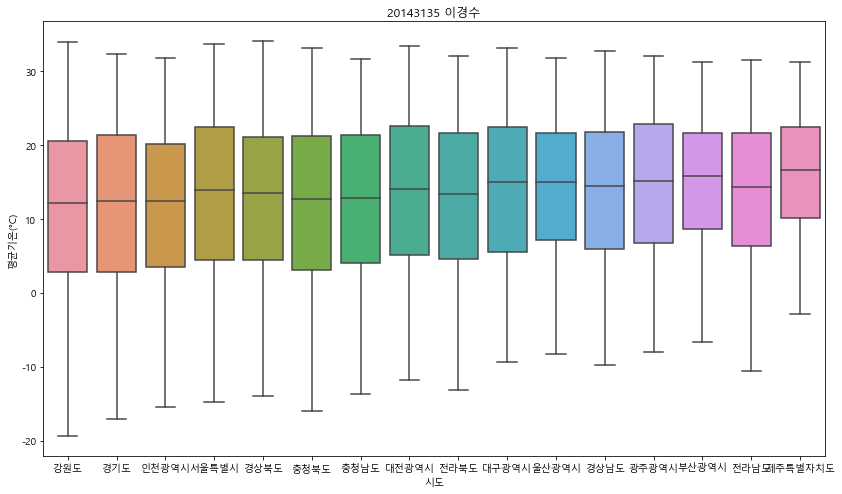

In [45]:
import seaborn as sns #boxplot 그려주는 페키지
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname="C:/windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams["figure.figsize"] = (14,8) #set size of Graph
########################################################
#LKS00 = LKS0.groupby(by=['시도','연도','월','일']).max()
#LKS00.reset_index(inplace=True)#인덱스를 콜럼으로 바꿔주기
sns.boxplot(x='시도',y='평균기온(°C)',data=abc) #PM10은 그냥 미세먼지 
#plt.axhline(151) #일반 미세먼지 기준치 151
plt.title('20143135 이경수')